In [1]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['text.usetex'] = False
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import time
from utrees import Baltobot
from treeffuser import Treeffuser
from sklearn.utils import check_random_state

In [2]:
# Generate the data
seed = 0
rng = check_random_state(seed)

nP = 500
XP = rng.uniform(0, 3, size=nP)
YP = rng.poisson(np.sqrt(XP), size=nP)
tfer = Treeffuser(sde_initialize_from_data=True, seed=seed)
tfer.fit(XP, YP)
YP_tfer = tfer.sample(XP, n_samples=1, seed=seed, verbose=True)
tber = Baltobot(random_state=seed)
tber.fit(XP.reshape(-1, 1), YP)
YP_tber = tber.sample(XP.reshape(-1, 1))

tbtaber = Baltobot(tabpfn=True, random_state=seed)
tbtaber.fit(XP.reshape(-1, 1), YP)
YP_tbtaber = tbtaber.sample(XP.reshape(-1, 1))

/Users/calvinm/miniconda3/envs/maskingtrees/lib/python3.9/site-packages/treeffuser/_base_tabular_diffusion.py:110: CastFloat32Warning: Input array is not float32; it has been recast to float32.
  X = _check_array(X)
/Users/calvinm/miniconda3/envs/maskingtrees/lib/python3.9/site-packages/treeffuser/_base_tabular_diffusion.py:113: CastFloat32Warning: Input array is not float32; it has been recast to float32.
  y = _check_array(y)
/Users/calvinm/miniconda3/envs/maskingtrees/lib/python3.9/site-packages/treeffuser/_base_tabular_diffusion.py:110: CastFloat32Warning: Input array is not float32; it has been recast to float32.
  X = _check_array(X)
/Users/calvinm/sandbox/unmasking-trees/utrees/baltobot.py:95: UserWarning: Support for TabPFN is experimental.
  warnings.warn('Support for TabPFN is experimental.')
/Users/calvinm/miniconda3/envs/maskingtrees/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.re

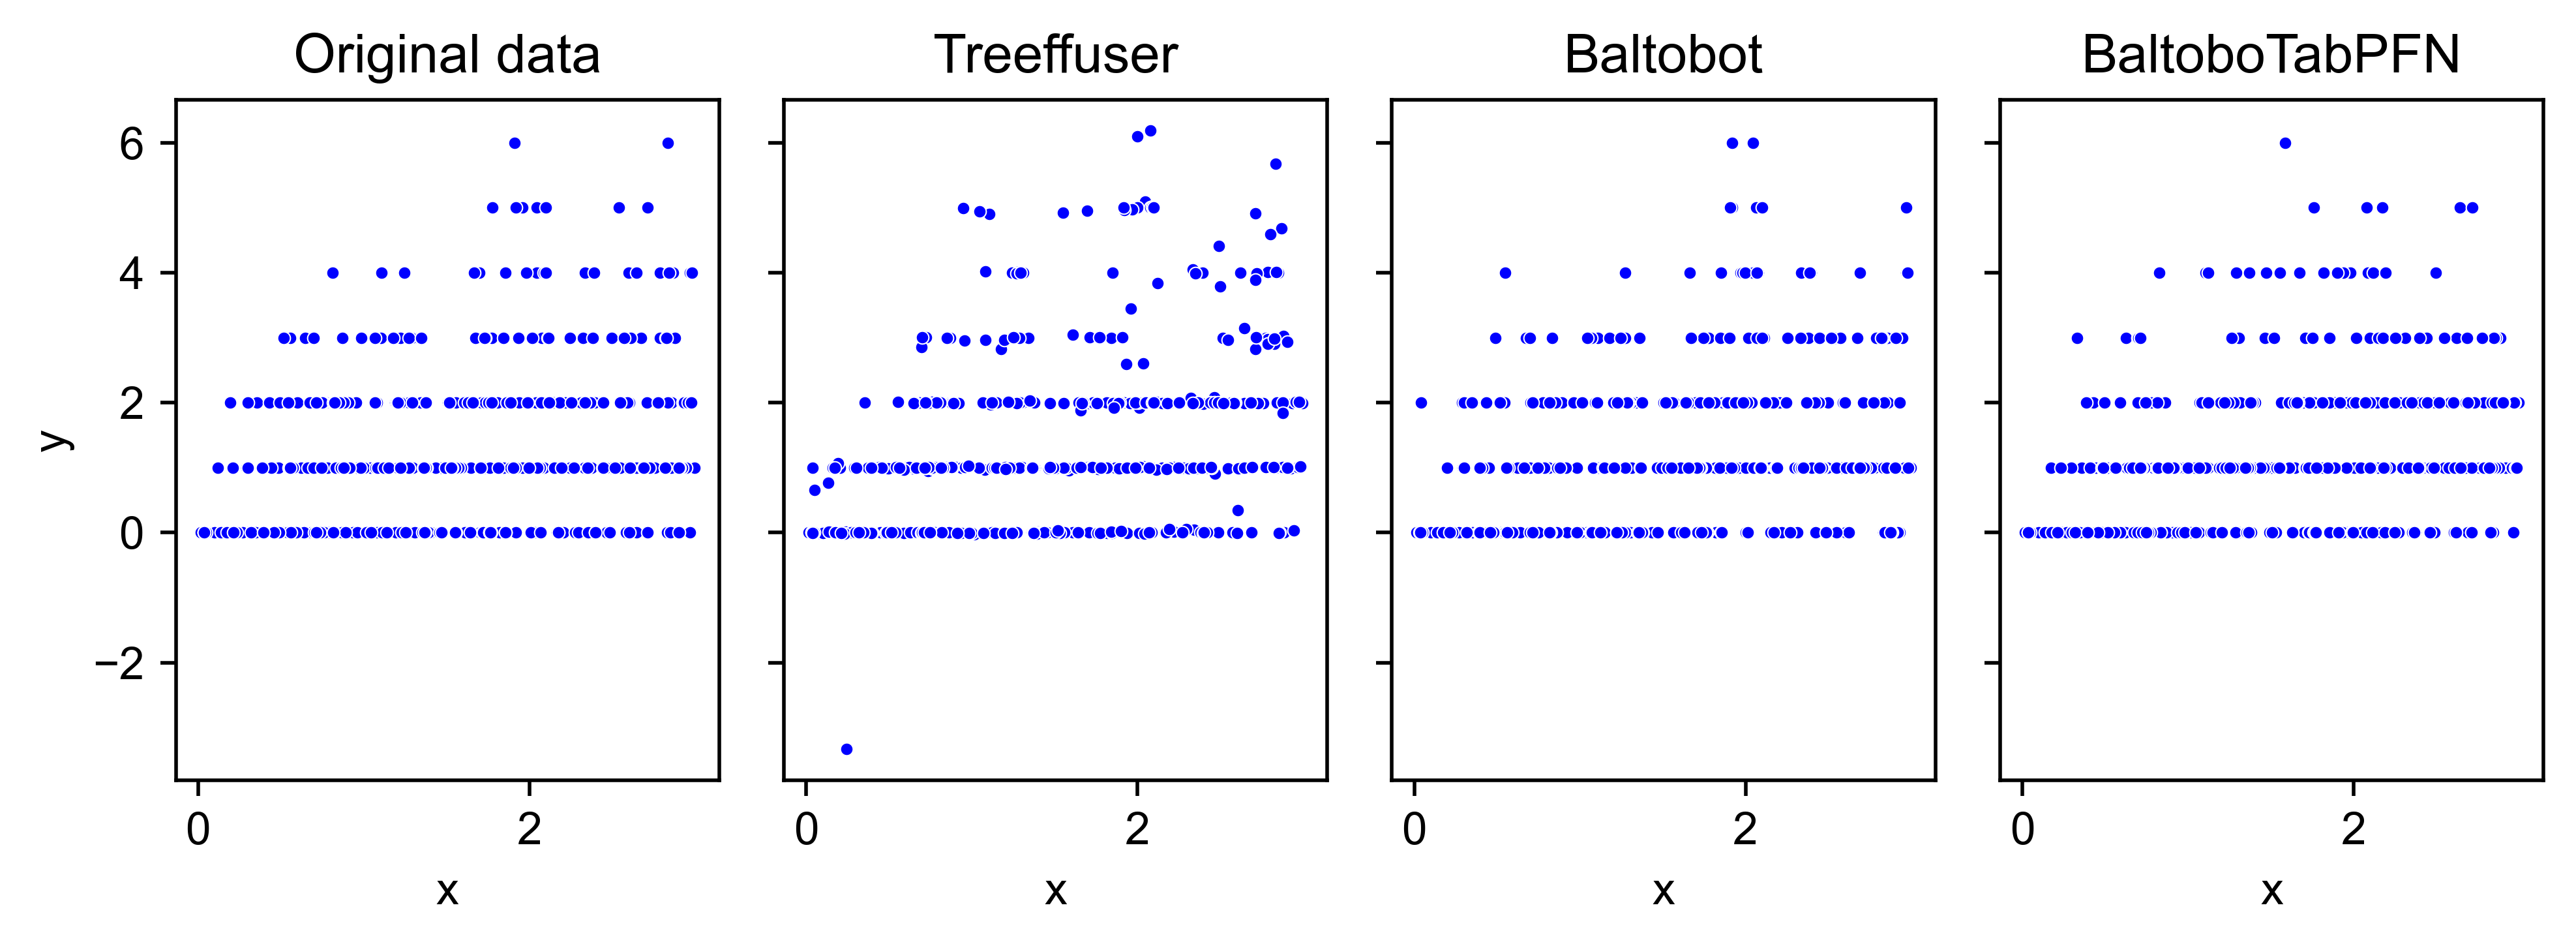

In [4]:
dfP = pd.DataFrame(); dfP['x'] = XP; dfP['y'] = YP
s = 8; linewidth=0.3; edgecolor='white'; markercolor='blue';
fig, axes = plt.subplots(figsize=(8,3), ncols=4, sharey=True, dpi=500);
sns.scatterplot(data=dfP, x='x', y='y', s=s, edgecolor=edgecolor, linewidth=linewidth, color=markercolor, ax=axes[0])
axes[0].set_title('Original data');
dfP_tfer = pd.DataFrame(); dfP_tfer['x'] = XP; dfP_tfer['y'] = YP_tfer.ravel()
sns.scatterplot(data=dfP_tfer, x='x', y='y', s=s, edgecolor=edgecolor, linewidth=linewidth, color=markercolor, ax=axes[1])
axes[1].set_title('Treeffuser')
dfP_tber = pd.DataFrame(); dfP_tber['x'] = XP; dfP_tber['y'] = YP_tber
sns.scatterplot(data=dfP_tber, x='x', y='y', s=s, edgecolor=edgecolor, linewidth=linewidth, color=markercolor, ax=axes[2])
axes[2].set_title('Baltobot')
dfP_tbtaber = pd.DataFrame(); dfP_tbtaber['x'] = XP; dfP_tbtaber['y'] = YP_tbtaber
sns.scatterplot(data=dfP_tbtaber, x='x', y='y', s=s, edgecolor=edgecolor, linewidth=linewidth, color=markercolor, ax=axes[3])
axes[3].set_title('BaltoboTabPFN')
plt.tight_layout();
plt.savefig('poisson-demo.png');